In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('solar_data_simulation.csv')
print(df.head())

       timestamp  irradiance  temperature
0  1/1/2023 0:00         0.0    27.500000
1  1/1/2023 1:00         0.0    28.213938
2  1/1/2023 2:00         0.0    28.830222
3  1/1/2023 3:00         0.0    29.330127
4  1/1/2023 4:00         0.0    29.698463


In [9]:
#Convert the timestamp column to datetime format for easier handling
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
#Check for missing values to and perform necessary cleaning
df.fillna(method = 'ffill', inplace= 'True)

print(df.head())

            timestamp  irradiance  temperature
0 2023-01-01 00:00:00         0.0    27.500000
1 2023-01-01 01:00:00         0.0    28.213938
2 2023-01-01 02:00:00         0.0    28.830222
3 2023-01-01 03:00:00         0.0    29.330127
4 2023-01-01 04:00:00         0.0    29.698463


C:\Users\admin\AppData\Local\Temp\ipykernel_10428\1014791027.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace= True)


In [25]:
#Function to calculate the Solar Panel Output
# Function to calculate the Solar Panel Output
def solar_panel_output(irradiance, efficiency, temperature_coefficient, temperature):
    adjusted_efficiency = efficiency * (1 + temperature_coefficient * (temperature - 25))
    output = irradiance * adjusted_efficiency
    return output
#Example Parameters for a generic Solar Panel
efficiency = 0.15 #Solar Panel Efficiency
temperature_coefficient = 0.004 # Efficiency change per degree celsius above 25


In [29]:
#Simulate Energy Output for each data point in the dataset
df['energy_ouput'] = df.apply(lambda x : solar_panel_output(x['irradiance'], efficiency, temperature_coefficient, x['temperature']), axis =1)

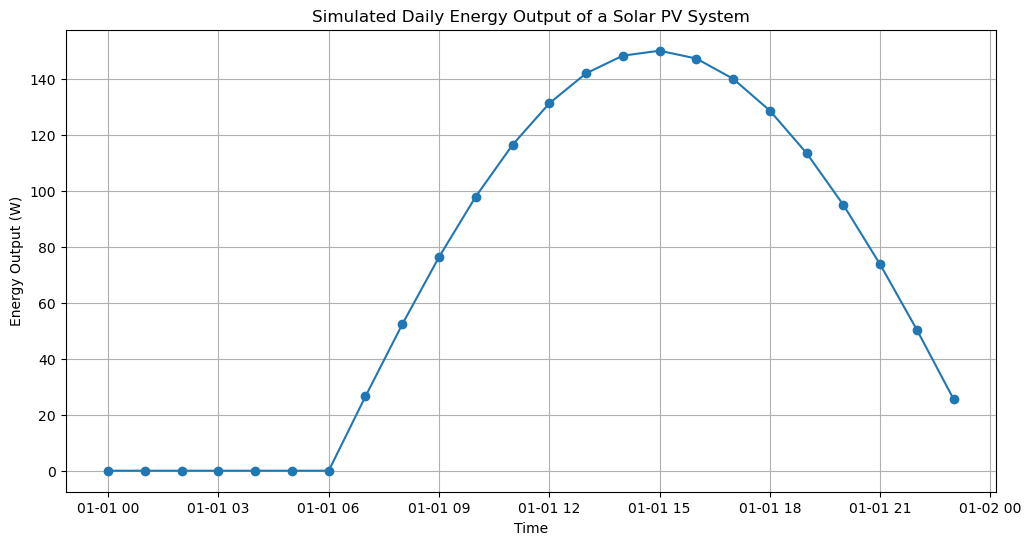

In [35]:
#Plot the energy ouput over the course of the day
plt.figure(figsize = (12, 6))
plt.plot(df['timestamp'], df['energy_ouput'], 'o-')
plt.title('Simulated Daily Energy Output of a Solar PV System')
plt.xlabel('Time')
plt.ylabel('Energy Output (W)')
plt.grid(True)
plt.show()